In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data (1).csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [4]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [5]:
df = df.drop('id',axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [6]:
df['ever_married'] = df['ever_married'].replace('Yes',1)
df['ever_married'] = df['ever_married'].replace('No',0)

df['work_type'] = df['work_type'].replace('Private',3)
df['work_type'] = df['work_type'].replace('Self-employed',4)
df['work_type'] = df['work_type'].replace('Govt_job',1)
df['work_type'] = df['work_type'].replace('children',0)
df['work_type'] = df['work_type'].replace('Never_worked',2)

df['Residence_type'] = df['Residence_type'].replace('Urban',1)
df['Residence_type'] = df['Residence_type'].replace('Rural',0)

df['smoking_status'] = df['smoking_status'].replace('formerly smoked',1)
df['smoking_status'] = df['smoking_status'].replace('never smoked',0)
df['smoking_status'] = df['smoking_status'].replace('smokes',2)
df['smoking_status'] = df['smoking_status'].replace('Unknown',3)

df['gender'] = df['gender'].replace('Male',1)
df['gender'] = df['gender'].replace('Female',0)
df['gender'] = df['gender'].replace('Other',2)

In [7]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,4,0,202.21,28.893237,0,1
2,1,80.0,0,1,1,3,0,105.92,32.500000,0,1
3,0,49.0,0,0,1,3,1,171.23,34.400000,2,1
4,0,79.0,1,0,1,4,0,174.12,24.000000,0,1


In [8]:
df.dtypes

,0
gender,int64
age,float64
hypertension,int64
heart_disease,int64
ever_married,int64
work_type,int64
Residence_type,int64
avg_glucose_level,float64
bmi,float64
smoking_status,int64


<Axes: xlabel='stroke', ylabel='count'>

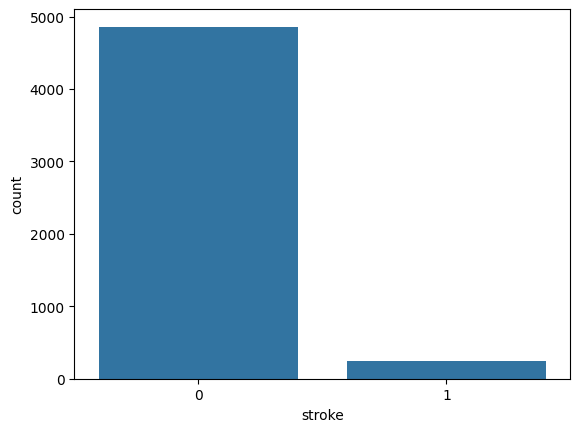

In [9]:
sns.countplot(data = df,x=df['stroke'])

In [10]:
df_maj = df[(df['stroke']==0)]
df_maino = df[(df['stroke']==1)]

df_maino_upsam = resample(df_maino,replace=True,n_samples=len(df_maj),random_state=42)

df_upsampled = pd.concat([df_maj,df_maino_upsam])

<Axes: xlabel='stroke', ylabel='count'>

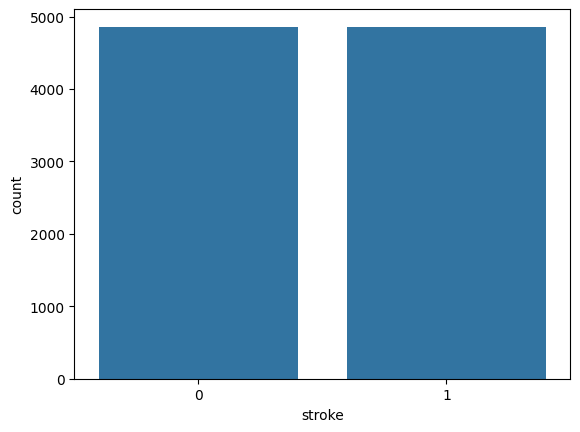

In [11]:
sns.countplot(data = df_upsampled,x=df_upsampled['stroke'])

In [12]:
x = df_upsampled.drop('stroke',axis=1)
y = df_upsampled['stroke']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 97.43 %


In [14]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 96.92 %


In [15]:
rf = RandomForestClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 97.43 %


In [16]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 78.82 %


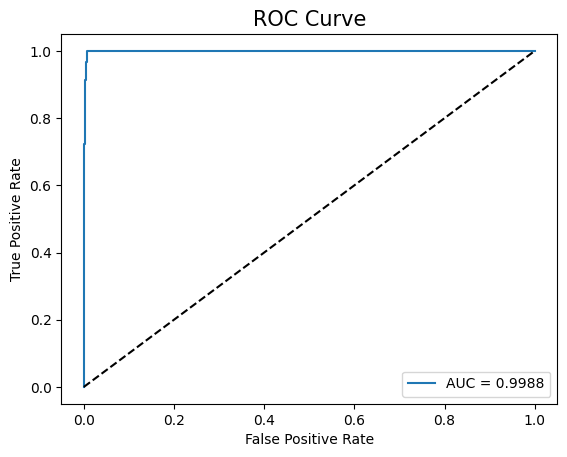

In [17]:
y_pred_proba = xgb.predict_proba(x_test)[:, 1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr,tpr,tr = roc_curve(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [24]:
model = XGBClassifier()
eval_set = [(x_test, y_test)]
model.fit(x_train,y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.55774
[1]	validation_0-logloss:0.47975
[2]	validation_0-logloss:0.42517
[3]	validation_0-logloss:0.39111
[4]	validation_0-logloss:0.36151
[5]	validation_0-logloss:0.34188
[6]	validation_0-logloss:0.32461
[7]	validation_0-logloss:0.30616
[8]	validation_0-logloss:0.29062
[9]	validation_0-logloss:0.28304
[10]	validation_0-logloss:0.27318
[11]	validation_0-logloss:0.27025
[12]	validation_0-logloss:0.26765
[13]	validation_0-logloss:0.26155
[14]	validation_0-logloss:0.25886
[15]	validation_0-logloss:0.25405
[16]	validation_0-logloss:0.24907
[17]	validation_0-logloss:0.23871
[18]	validation_0-logloss:0.23132
[19]	validation_0-logloss:0.22510
[20]	validation_0-logloss:0.21913
[21]	validation_0-logloss:0.21771
[22]	validation_0-logloss:0.21158
[23]	validation_0-logloss:0.20712
[24]	validation_0-logloss:0.20667
[25]	validation_0-logloss:0.19999
[26]	validation_0-logloss:0.19506
[27]	validation_0-logloss:0.19354
[28]	validation_0-logloss:0.19235
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

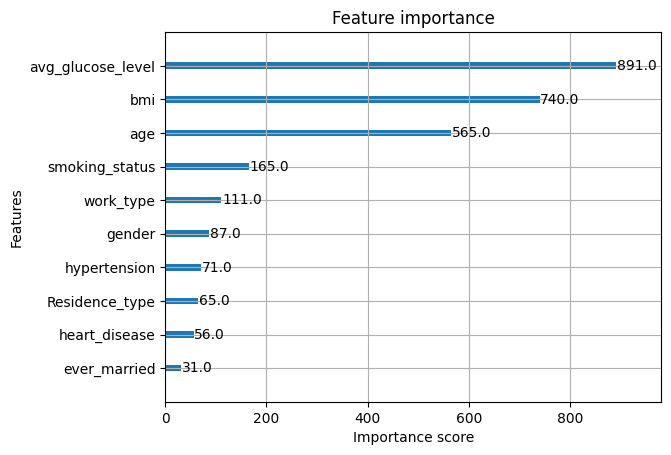

<Figure size 3000x4500 with 0 Axes>

In [25]:
plot_importance(model)
plt.figure(figsize=(30,45))
plt.show()

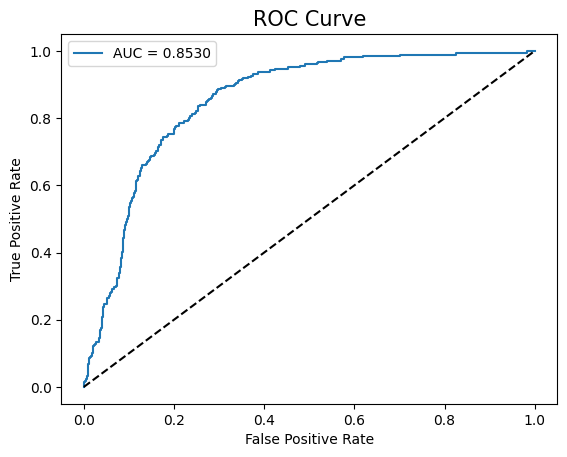

In [26]:
y_pred_proba = lr.predict_proba(x_test)[:, 1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr,tpr,tr = roc_curve(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

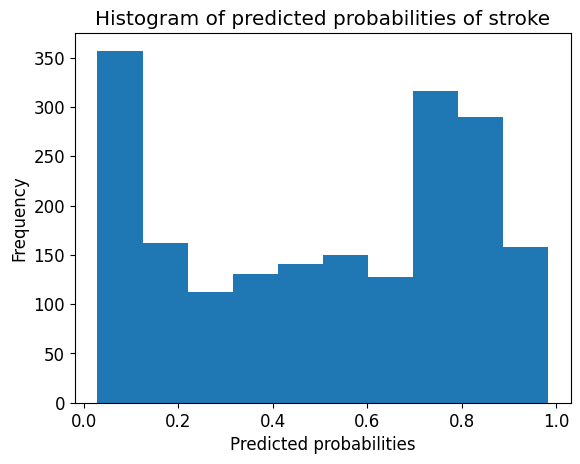

In [28]:
y_pre = lr.predict_proba(x_test)[:,1]
plt.rcParams['font.size'] = 12
plt.hist(y_pre,bins=10)
plt.title('Histogram of predicted probabilities of stroke')
plt.xlabel('Predicted probabilities')
plt.ylabel('Frequency')
plt.show()

In [29]:
Xnew = [[1, 50, 0, 1, 0, 3, 1, 140, 25, 2]]
y_pred_prob2 = lr.predict_proba(Xnew)
y_pred_prob_df2 = pd.DataFrame(data=y_pred_prob2, columns=['Prob of dont have stroke', 'Prob of have stroke'])
y_pred_prob_df2

,Prob of dont have stroke,Prob of have stroke
0,0.334162,0.665838


In [33]:
gender = int(input("Your Gender (0 = Female, 1 = Male) : "))
age = float(input("Your Age : "))
hypertension = int(input("Do you have hypertension ? (0 = No, 1 = Yes) : "))
heart = int(input("Do you have heart disease ? (0 = No, 1 = Yes) :"))
marry = int(input("Did you ever married ? (0 = No, 1 = Yes) :"))
work = int(input("Your Worktype ? (0 = children, 1 = Government job, 2 = Never worked, 3 = Private, 4 = Self Employed) : "))
residence = int(input("Your Residence type ? (0 = Rural, 1 = Urban) : "))
avg = float(input("Average Glucose Level : "))
bmi = float(input("Your BMI : "))
smoke = int(input("Your Smoking status ? (0 = never smoked, 1 = formerly smoked, 2 = smokes, 3 = unknown) : "))

Xnew3 = [[gender, age, hypertension, heart, marry, work, residence, avg, bmi, smoke]]


y_pred_prob4 = xgb.predict_proba(Xnew3)
y_pred_prob_df4 = pd.DataFrame(data=y_pred_prob4, columns=['Prob of dont have stroke', 'Prob of have stroke'])
y_pred_prob_df4

Your Gender (0 = Female, 1 = Male) : 1
Your Age : 25
Do you have hypertension ? (0 = No, 1 = Yes) : 0
Do you have heart disease ? (0 = No, 1 = Yes) :0
Did you ever married ? (0 = No, 1 = Yes) :0
Your Worktype ? (0 = children, 1 = Government job, 2 = Never worked, 3 = Private, 4 = Self Employed) : 2
Your Residence type ? (0 = Rural, 1 = Urban) : 1
Average Glucose Level : 100
Your BMI : 35
Your Smoking status ? (0 = never smoked, 1 = formerly smoked, 2 = smokes, 3 = unknown) : 0


,Prob of dont have stroke,Prob of have stroke
0,0.999997,0.000003
